# Here are some examples of lineplot functionality...

In [1]:
import avt

import seaborn as sns
import pandas as pd

In [2]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


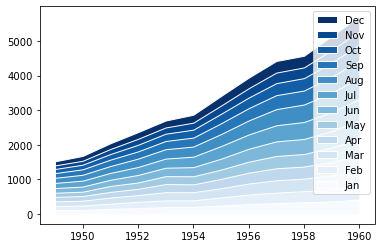

In [3]:
ax = avt.stackplot(flights, x='year', y='passengers', hue='month', cmap='Blues')

ax.figure.savefig('./figures/stackplot.png')
ax.figure.savefig('../docs/source/figures/stackplot.png')